# Credit Risk Loan Prediction

### Import Library

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option("display.max_colwidth", 1000)

### Data Understanding

In [23]:
LCdata_dict = pd.read_excel("LCDataDictionary.xlsx", sheet_name="LoanStats", skiprows = [i for i in range(79, 100) ])
LCdata_dict.index = np.arange(1, len(LCdata_dict) + 1)
LCdata_dict[["Features", "Description"]]

,Features,Description
1,_rec,The total amount committed by investors for that loan at that point in time.
2,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
3,addr_state,The state provided by the borrower in the loan application
4,all_util,Balance to credit limit on all trades
5,annual_inc,The self-reported annual income provided by the borrower during registration.
6,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
7,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
8,collection_recovery_fee,post charge off collection fee
9,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
10,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [52]:
df = pd.read_csv('loan_data_2007_2014.csv')
df = df.drop('Unnamed: 0', axis=1)
df.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
266522,33140073,35783286,18000,18000,18000.0,60 months,13.35,412.79,C,C2,Public Relations Manager,9 years,MORTGAGE,84000.0,Not Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=33140073,NaN,credit_card,Credit card refinancing,630xx,MO,30.27,0.0,Apr-88,2.0,NaN,NaN,12.0,0.0,31690,55.1,26.0,w,14799.40,14799.40,5765.710000,5765.71,3200.60,2565.11,0.00,0.0,0.0,Jan-16,412.79,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,286452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57500.0,NaN,NaN,NaN
66779,8666952,10438895,5000,5000,5000.0,60 months,15.10,119.22,C,C2,NaN,5 years,RENT,40000.0,Verified,Nov-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=8666952,NaN,credit_card,personal,115xx,NY,2.25,0.0,May-09,0.0,NaN,NaN,2.0,0.0,3787,40.7,5.0,f,0.00,0.00,5246.628646,5246.63,5000.00,246.63,0.00,0.0,0.0,Mar-14,4890.41,NaN,Jul-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,3787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9300.0,NaN,NaN,NaN
225568,1120852,1358759,35000,35000,35000.0,60 months,19.99,927.10,E,E1,North Cambria Fuel C0.,10+ years,OWN,75000.0,Verified,Mar-12,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1120852,"Borrower added on 02/15/12 > pay of all my billls<br><br> Borrower added on 02/15/12 > i would like to pay off my credit cards off because all ways had good credit but right it is pulling me down. i want to get a head and stay a head. i do not like it when i fakk behind, thank you very much.<br>",credit_card,payoff credit card,157xx,PA,10.30,0.0,Jul-02,1.0,NaN,NaN,7.0,0.0,8644,74.5,14.0,f,11552.21,11552.21,42600.880000,42600.88,23447.79,19153.09,0.00,0.0,0.0,Jan-16,927.10,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340713,21971383,24294332,27300,27300,27300.0,60 months,24.99,801.14,F,F4,forklift/loader operator,3 years,MORTGAGE,72000.0,Source Verified,Jul-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=21971383,NaN,debt_consolidation,Debt consolidation,012xx,MA,11.65,0.0,Nov-09,3.0,NaN,NaN,6.0,0.0,6543,46.4,7.0,w,0.00,0.00,10078.860000,10078.86,3018.51,6955.11,105.24,0.0,0.0,Dec-15,400.00,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN
335270,22434549,24767201,9600,9600,9600.0,36 months,7.69,299.46,A,A4,Account Executive,2 years,RENT,46000.0,Not Verified,Jul-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=22434549,NaN,debt_consolidation,Debt consolidation,021xx,MA,26.34,0.0,Dec-05,0.0,NaN,NaN,10.0,0.0,11376,84.3,22.0,f,0.00,0.00,10217.750000,10217.75,9600.00,617.75,0.00,0.0,0.0,Jul-15,7223.15,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,59753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.0,NaN,NaN,NaN


### Exploratory Data Analysis

In [53]:
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])
print("Duplicate Value:", df.duplicated().sum())
list_df = []
for col in df.columns:
    list_df.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col])])
df_desc = pd.DataFrame(data=list_df, columns=['Feature','Data Type','Null', 'Null (%)'])
df_desc

Total Rows : 466285
Total Features : 74
Duplicate Value: 0


,Feature,Data Type,Null,Null (%)
0,id,int64,0,0.000000
1,member_id,int64,0,0.000000
2,loan_amnt,int64,0,0.000000
3,funded_amnt,int64,0,0.000000
4,funded_amnt_inv,float64,0,0.000000
5,term,object,0,0.000000
6,int_rate,float64,0,0.000000
7,installment,float64,0,0.000000
8,grade,object,0,0.000000
9,sub_grade,object,0,0.000000


In [54]:
drop_list = df_desc[df_desc['Null (%)'] > 25]['Feature'] #drop feature that have more than 25% missing value
drop_list = list(drop_list) + ['member_id', 'id'] #drop member_id and id, because we don't need it

In [55]:
df.drop(labels = drop_list, axis = 1, inplace = True)

In [56]:
loan_status = df['loan_status'].value_counts()

Current : 48.09%
Fully Paid : 39.62%
Charged Off : 9.11%
Late (31-120 days) : 1.48%
In Grace Period : 0.67%
Does not meet the credit policy. Status:Fully Paid : 0.43%
Late (16-30 days) : 0.26%
Default : 0.18%
Does not meet the credit policy. Status:Charged Off : 0.16%


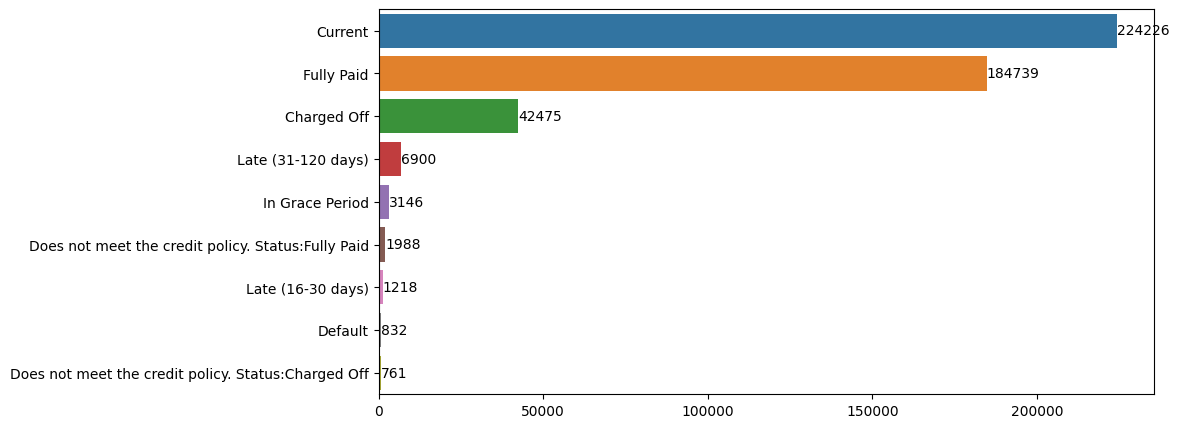

In [157]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(x = loan_status.values, y = loan_status.index)

for val in ax.containers:
    ax.bar_label(val,)

for stat in loan_status.index:
    
    print(stat, ':', f"{round((loan_status[stat] / 466285)  * 100, 2)}%")

##### Lable Data based on status

In [58]:
good = ['Fully Paid'] 
bad = ['Charged Off', 'Does not meet the credit policy. Status:Fully Paid', 
       'Default', 'Does not meet the credit policy. Status:Charged Off']

In [60]:
def add_Label(values):  
    if values in good:
        return 1
    return 0

In [61]:
new_df = df[df['loan_status'].isin(good + bad)].copy()
new_df['loan_status'] = new_df['loan_status'].apply(add_Label)

In [64]:
new_df.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
43617,12000,12000,12000.0,36 months,12.85,403.47,B,B4,Vault Teller,3 years,MORTGAGE,32400.0,Not Verified,Dec-13,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=10098080,debt_consolidation,Debt consolidation,980xx,WA,22.67,0.0,Aug-86,0.0,15.0,0.0,7897,22.5,21.0,w,0.0,0.0,12376.64000,12376.64,12000.00,376.64,0.0,0.00,0.0000,Apr-14,11569.70,Mar-14,0.0,1,INDIVIDUAL,0.0,0.0,23067.0,35100.0
160236,12000,12000,11950.0,36 months,12.12,399.26,B,B3,KSC Kreate,6 years,MORTGAGE,90000.0,Not Verified,Mar-13,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=3538668,debt_consolidation,Consolidation,334xx,FL,7.91,0.0,Mar-05,0.0,9.0,0.0,3728,76.1,22.0,f,0.0,0.0,14208.40102,14149.20,12000.00,2208.40,0.0,0.00,0.0000,Jun-15,3833.36,Jan-16,0.0,1,INDIVIDUAL,0.0,354.0,211110.0,4900.0
439574,14925,14925,14925.0,36 months,18.92,546.49,D,D4,Settlement Officer,10+ years,RENT,52000.0,Verified,Feb-14,0,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=11275888,debt_consolidation,Debt consolidation,190xx,PA,26.22,0.0,Oct-00,5.0,18.0,0.0,20202,69.7,33.0,w,0.0,0.0,7141.22000,7141.22,3342.05,2122.85,0.0,1676.32,16.7632,Dec-14,546.49,May-15,0.0,1,INDIVIDUAL,0.0,0.0,66444.0,29000.0
228824,10000,10000,10000.0,36 months,14.65,344.95,C,C3,Spectrum Analytical Inc,7 years,MORTGAGE,50000.0,Not Verified,Jan-12,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1103768,debt_consolidation,Debt consolidation,010xx,MA,10.58,1.0,Jun-05,1.0,11.0,0.0,14779,66.9,17.0,f,0.0,0.0,11818.58000,11818.58,10000.00,1818.58,0.0,0.00,0.0000,Aug-13,5617.75,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
284657,8650,8650,8650.0,36 months,16.29,305.35,D,D2,patient care tech,2 years,OWN,80000.0,Source Verified,Oct-14,1,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=28573668,debt_consolidation,Debt consolidation,951xx,CA,8.13,1.0,Mar-02,1.0,8.0,0.0,4123,47.4,13.0,f,0.0,0.0,9501.76000,9501.76,8650.00,851.76,0.0,0.00,0.0000,May-15,7677.49,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,19381.0,8700.0


In [93]:
status_percentage = 100*new_df['loan_status'].value_counts()/len(new_df['loan_status'])
status_percentage = pd.DataFrame(status_percentage)
status_percentage.rename(columns={"loan_status": "Status Percentage"}, inplace =True)
status_percentage.insert(0, "Status", ['Good','Bad'], True)

In [94]:
status_percentage

,Status,Status Percentage
1,Good,80.044628
0,Bad,19.955372


##### Data Correlations

In [95]:
correlations = (new_df.select_dtypes(exclude=object)
                .corr()
                .dropna(how="all", axis=0)
                .dropna(how="all", axis=1)
)

In [96]:
correlations['loan_status'].sort_values(ascending = False)

loan_status                   1.000000
total_rec_prncp               0.460338
last_pymnt_amnt               0.384781
total_pymnt_inv               0.358588
total_pymnt                   0.355349
tot_cur_bal                   0.076230
annual_inc                    0.061623
total_rev_hi_lim              0.052931
total_acc                     0.030680
tot_coll_amt                  0.001637
collections_12_mths_ex_med   -0.005582
pub_rec                      -0.006355
acc_now_delinq               -0.006406
revol_bal                    -0.011371
open_acc                     -0.013934
delinq_2yrs                  -0.019631
total_rec_int                -0.032997
installment                  -0.033419
funded_amnt_inv              -0.039854
funded_amnt                  -0.048790
loan_amnt                    -0.049253
revol_util                   -0.089180
out_prncp_inv                -0.099814
out_prncp                    -0.099816
dti                          -0.107257
inq_last_6mths           

In [97]:
have_cor = correlations[(correlations >= 0.5) & (correlations <= 0.9)]

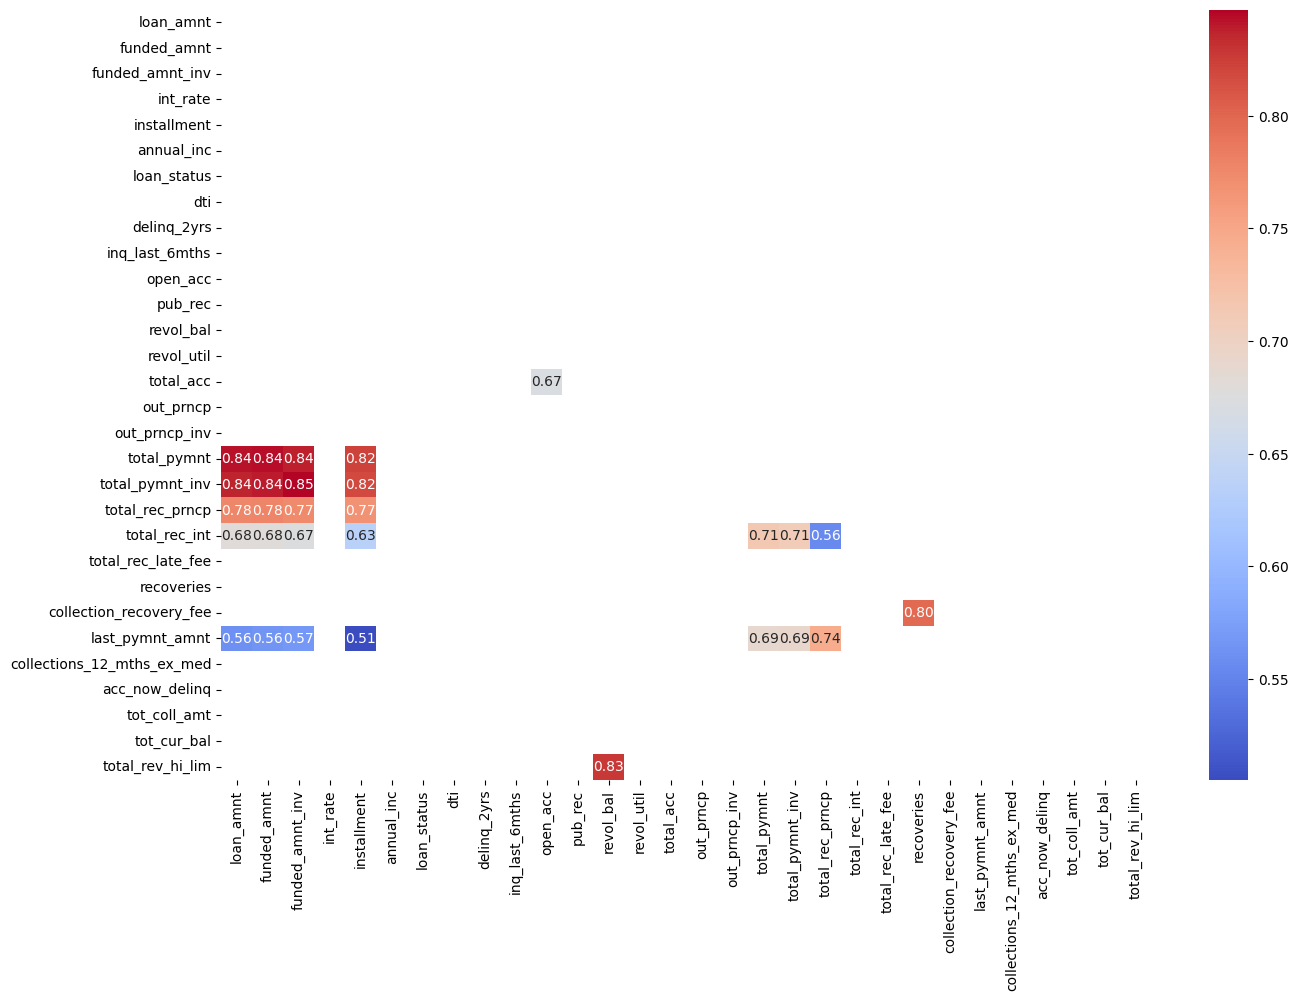

In [155]:
plt.figure(figsize = (15, 10))
cor_plot = sns.heatmap(
                have_cor, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm",
                mask=np.triu(np.ones_like(have_cor, dtype=bool))
)

##### Model

In [114]:
X = new_df.drop(columns="loan_status")
y = new_df.loan_status


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((184636, 49), (46159, 49), (184636,), (46159,))

In [115]:
numerical_feature = have_cor.columns[have_cor.notnull().any()].tolist()
numerical_feature

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'open_acc',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [116]:
categorical_feature = ["grade", "emp_length", "home_ownership", "verification_status", "purpose"]
categorical_feature

['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

In [110]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numerical_feature),
    ("categoric", categorical_pipeline, categorical_feature)
])

In [117]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

In [134]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'installment', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_prncp',
                                                   'total_rec_int',
                                                   'recoveries',
                                                   'collection_recovery_fee',
                                                   'last_pymnt_amnt',
                                                   'total_rev_hi_lim']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['grade', 'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'purpose'])])),
                ('algo', LogisticRegression())])

In [119]:
pipeline.score(X_test, y_test)

0.9827119305010941

In [142]:
pipeline.fit(X_train, y_train)
y_pred_proba = pipeline.predict_proba(X_test)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
AUC = roc_auc_score(y_test, y_pred_proba[:, 1])


print("Accuracy ",accuracy)
print("Recall ",recall)
print("Precision ",precision)
print("AUC ",AUC)

Accuracy  0.9827119305010941
Recall  0.9977265345891523
Precision  0.9809995209963276
AUC  0.991884988091548


In [148]:
report = classification_report(y_true = y_train, y_pred = pipeline.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     36845
           1       0.98      1.00      0.99    147791

    accuracy                           0.98    184636
   macro avg       0.99      0.96      0.97    184636
weighted avg       0.98      0.98      0.98    184636



In [152]:
confusion = confusion_matrix(y_true = y_test, y_pred = pipeline.predict(X_test))

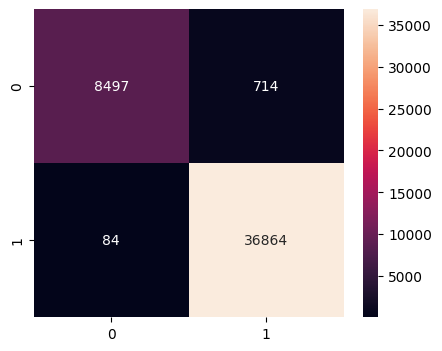

In [158]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt="g")
plt.show()